In [117]:
import FinanceDataReader as fdr
import pandas   as pd
df_krx = fdr.StockListing('KRX')
df_krx = df_krx.set_index('Symbol')  # 'Symbol 칼럼을 인덱스칼럼으로 지정한다.
# dsccribe 로 건수정보 파악한다.
# df_krx.describe(datetime_is_numeric=True)
# info 칼럼구성과 타입등을 확인한다.
# df_krx.info()
df_krx.head()

,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Symbol,,,,,,,,,
060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [102]:
df_krx.loc[df_krx['Industry'].str.contains('웨딩서비스')==True]

,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Symbol,,,,,,,,,
114840,KOSDAQ,아이패밀리에스씨,기타 화학제품 제조업,"색조화장품 브랜드 `롬앤(Rom&nd)', IT기반 웨딩서비스 브랜드 `아이웨딩`",2021-10-28,12월,"김태욱, 김성현",http://www.ifamily.co.kr,서울특별시


데이터 안에 ' 가 있는 경우 SQL 내에 포함될경우가 있어서 
insert 실패한다. 데이터를 확인해봤다

DATA:   색조화장품 브랜드 `롬앤(Rom&nd)', IT기반 웨딩서비스 브랜드 `아이웨딩`

<AxesSubplot:xlabel='Date'>

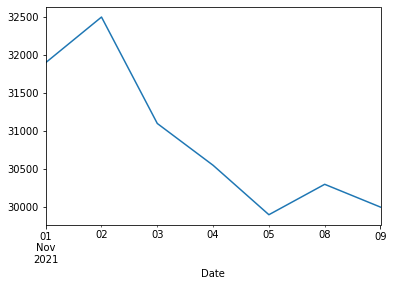

In [42]:
df = fdr.DataReader('079160', '2021-11')  # CJ CGV
df.head(10)
df['Close'].plot()

fdr 안에도 plot 기능까지 있네 ..놀랍네

CREATE TABLE IF NOT EXISTS company_info (     
    symbol VARCHAR(20),     
    market VARCHAR(20),     
    name VARCHAR(40),     
    sector VARCHAR(100),     
    industry VARCHAR(100),     
    last_update DATE,     
    PRIMARY KEY (symbol))     

쿼리툴에서 create table 로 테이블을 미리 생성함

In [118]:
df_krx = df_krx[['Market','Name','Sector','Industry']]  #테이블로 로딩할 칼럼만 선택한다.
df_krx = df_krx.loc[df_krx['Name'].str.contains('WR') == False]  # WR(신주인수권) 요상한 종목들이 있어서 걸러냈다
df_krx['Industry'] = df_krx['Industry'].str.replace("'",' ') # 데이터 안에 싱글이 있어서 제거했다.
df_krx.loc[df_krx['Industry'].str.contains('웨딩서비스')==True]

,Market,Name,Sector,Industry
Symbol,,,,
114840,KOSDAQ,아이패밀리에스씨,기타 화학제품 제조업,"색조화장품 브랜드 `롬앤(Rom&nd) , IT기반 웨딩서비스 브랜드 `아이웨딩`"


테이블에 로딩하기전 데이터를 좀 깨끗하게 해야한다.

In [113]:
import pymysql
from datetime import datetime
connection = pymysql.connect(host='localhost', port=3306, db='Investar', \
    user='root', passwd ='', autocommit=True)
cursor = connection.cursor()
sql = 'truncate table company_info'
cursor.execute(sql)
connection.commit()

today = datetime.today().strftime('%Y-%m-%d')
count = 0
for  row in df_krx.itertuples(name='KRX') :
    count += 1
    sql =  f"INSERT INTO company_info (symbol, market, name, sector, industry, last_update) "+ \
           f"VALUES ('{row.Index}', '{row.Market}', '{row.Name}', '{row.Sector}', '{row.Industry}', '{today}')"
    
    tmnow = datetime.now().strftime('%Y-%m-%d %H:%M')
    print(f"{count}:[{tmnow}] : {row.Index} INSERTED ")
    cursor.execute(sql)
    connection.commit()
print("insert completed")

1:[2021-11-09 14:09] : 060310 INSERTED 
2:[2021-11-09 14:09] : 095570 INSERTED 
3:[2021-11-09 14:09] : 006840 INSERTED 
4:[2021-11-09 14:09] : 054620 INSERTED 
5:[2021-11-09 14:09] : 265520 INSERTED 
6:[2021-11-09 14:09] : 211270 INSERTED 
7:[2021-11-09 14:09] : 152100 INSERTED 
8:[2021-11-09 14:09] : 295820 INSERTED 
9:[2021-11-09 14:09] : 253150 INSERTED 
10:[2021-11-09 14:09] : 253160 INSERTED 
11:[2021-11-09 14:09] : 395750 INSERTED 
12:[2021-11-09 14:09] : 395760 INSERTED 
13:[2021-11-09 14:09] : 278420 INSERTED 
14:[2021-11-09 14:09] : 292750 INSERTED 
15:[2021-11-09 14:09] : 309210 INSERTED 
16:[2021-11-09 14:09] : 333940 INSERTED 
17:[2021-11-09 14:09] : 333950 INSERTED 
18:[2021-11-09 14:09] : 333960 INSERTED 
19:[2021-11-09 14:09] : 333970 INSERTED 
20:[2021-11-09 14:09] : 333980 INSERTED 
21:[2021-11-09 14:09] : 269530 INSERTED 
22:[2021-11-09 14:09] : 251590 INSERTED 
23:[2021-11-09 14:09] : 161510 INSERTED 
24:[2021-11-09 14:09] : 251600 INSERTED 
25:[2021-11-09 14:09] : 2